# Training a simple MLP Classifier on Individual Writers with Uniformly Randomly assigned labels

In [2]:
# Import package and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from IPython.display import Markdown

import pickle
from time import time, localtime, asctime

We will perform the same loading procedure as before to retrieve the writing images and labels.

In [3]:
start = 20
end = 40

data_dir = "data/intermediate/"
chunking = "chunking/"
hashes = "hashes/"
csvs = "csvs/"

base_mnist_path = "../mnist/"
by_field_dir = "by_field/"

In [4]:
df = pd.read_csv(data_dir+csvs+"mnist_chunks_"+str(start)+"_to_"+str(end)+"_pixel.csv", dtype="str")

In [5]:
df = df.astype({"pixel_"+str(pixel_1d):np.uint8 for pixel_1d in range((128**2))})

#df.dtypes

In [31]:
df = df.astype({"label": "category", "char_type": "category", "author_id": "category"})
number_authors= len(df["author_id"].unique())

We will still split the data into training and testing sets, but we will do this **by author** to and uniformly randomly assign 10 labels to each writing sample. This generates a dataset per writer where we can demonstrate the performance of the MLP Classifier assuming $H_0$: _"all writers write the same"_.

In [12]:
# Split data into testing and training data
random_label_per_auth = {}

for author_id in df["author_id"].unique():
    
    random_label_per_auth[author_id] = {}
    data = df[df["author_id"]==author_id]
    #display(data.shape)
    #uniformly assign random author_ids for the handwriting samples of this one author
    train_features, test_features, train_outcome, test_outcome = train_test_split(
    data.drop(["author_id", "label", "char_type"], axis=1),
    np.random.randint(0, number_authors+1, size=data.shape[0]), random_state=0)
    
    random_label_per_auth[author_id]["train"] = train_features
    random_label_per_auth[author_id]["train_outcome"] = train_outcome
    random_label_per_auth[author_id]["test"] = test_features
    random_label_per_auth[author_id]["test_outcome"] = test_outcome
    


Now we'll train the classifier with a 3 hidden layer perceptron net (256, 256, 128), using the default "adam" solver, and a max iteration of 20 for times sake on each of these randomized label datasets to determine what predictions we would see on an individual writer's writing samples, this will give us a **distribution sample of predictions** in the $H_0$ case that "everyone writes the same".

In [14]:
for author_id, data_dict in random_label_per_auth.items():
# Create and fit the classifier (use a pipeline to incorporate this into the full process!)
    train_features = data_dict["train"]
    train_outcome = data_dict["train_outcome"]
    mlp = MLPClassifier((256, 256, 128, ), solver="adam", verbose=True, max_iter=20, random_state=0).fit(train_features, train_outcome)
    random_label_per_auth[author_id]["mlp"] = mlp

Iteration 1, loss = 2.41153673
Iteration 2, loss = 2.26079272
Iteration 3, loss = 2.07105241
Iteration 4, loss = 1.88109105
Iteration 5, loss = 1.67937092
Iteration 6, loss = 1.45744639
Iteration 7, loss = 1.24712114
Iteration 8, loss = 1.05012187
Iteration 9, loss = 0.87770964
Iteration 10, loss = 0.73014522
Iteration 11, loss = 0.60985944
Iteration 12, loss = 0.50001347
Iteration 13, loss = 0.42780697
Iteration 14, loss = 0.33278355
Iteration 15, loss = 0.26530833
Iteration 16, loss = 0.21387331
Iteration 17, loss = 0.17148996
Iteration 18, loss = 0.14118533
Iteration 19, loss = 0.11476646
Iteration 20, loss = 0.09231465


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.43079311
Iteration 2, loss = 2.30138901
Iteration 3, loss = 2.14920182
Iteration 4, loss = 1.98309565
Iteration 5, loss = 1.79331272
Iteration 6, loss = 1.60674718
Iteration 7, loss = 1.42759336
Iteration 8, loss = 1.24888014
Iteration 9, loss = 1.07290512
Iteration 10, loss = 0.93157163
Iteration 11, loss = 0.78143931
Iteration 12, loss = 0.65480472
Iteration 13, loss = 0.53929751
Iteration 14, loss = 0.43808425
Iteration 15, loss = 0.35310397
Iteration 16, loss = 0.28894506
Iteration 17, loss = 0.22033305
Iteration 18, loss = 0.18252624
Iteration 19, loss = 0.13749602
Iteration 20, loss = 0.11379632


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.41347047
Iteration 2, loss = 2.23929573
Iteration 3, loss = 1.99750019
Iteration 4, loss = 1.74083019
Iteration 5, loss = 1.47700767
Iteration 6, loss = 1.21200338
Iteration 7, loss = 0.96990689
Iteration 8, loss = 0.77326689
Iteration 9, loss = 0.60683347
Iteration 10, loss = 0.48409581
Iteration 11, loss = 0.34963530
Iteration 12, loss = 0.27032342
Iteration 13, loss = 0.19796417
Iteration 14, loss = 0.14904299
Iteration 15, loss = 0.10479617
Iteration 16, loss = 0.08230991
Iteration 17, loss = 0.05847654
Iteration 18, loss = 0.04351350
Iteration 19, loss = 0.03342553
Iteration 20, loss = 0.02658747


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.42901326
Iteration 2, loss = 2.26016224
Iteration 3, loss = 2.06799147
Iteration 4, loss = 1.86483129
Iteration 5, loss = 1.64114179
Iteration 6, loss = 1.43724605
Iteration 7, loss = 1.22715274
Iteration 8, loss = 1.04749833
Iteration 9, loss = 0.86004249
Iteration 10, loss = 0.71777563
Iteration 11, loss = 0.57387071
Iteration 12, loss = 0.44899456
Iteration 13, loss = 0.36099371
Iteration 14, loss = 0.27411002
Iteration 15, loss = 0.21783027
Iteration 16, loss = 0.17321181
Iteration 17, loss = 0.13296385
Iteration 18, loss = 0.10994923
Iteration 19, loss = 0.08241139
Iteration 20, loss = 0.06798514


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.43806484
Iteration 2, loss = 2.21776318
Iteration 3, loss = 1.98227409
Iteration 4, loss = 1.75643977
Iteration 5, loss = 1.52344103
Iteration 6, loss = 1.35355040
Iteration 7, loss = 1.15319682
Iteration 8, loss = 1.01019907
Iteration 9, loss = 0.90941220
Iteration 10, loss = 0.74847940
Iteration 11, loss = 0.67132175
Iteration 12, loss = 0.56945762
Iteration 13, loss = 0.50451369
Iteration 14, loss = 0.42693650
Iteration 15, loss = 0.37628023
Iteration 16, loss = 0.32845194
Iteration 17, loss = 0.26952589
Iteration 18, loss = 0.24747712
Iteration 19, loss = 0.21197128
Iteration 20, loss = 0.17791228


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.42955249
Iteration 2, loss = 2.20574151
Iteration 3, loss = 1.92900674
Iteration 4, loss = 1.62312031
Iteration 5, loss = 1.32760672
Iteration 6, loss = 1.10173433
Iteration 7, loss = 0.84469425
Iteration 8, loss = 0.70149583
Iteration 9, loss = 0.56060615
Iteration 10, loss = 0.46134599
Iteration 11, loss = 0.34852193
Iteration 12, loss = 0.27581582
Iteration 13, loss = 0.22389082
Iteration 14, loss = 0.18623848
Iteration 15, loss = 0.14387398
Iteration 16, loss = 0.12271680
Iteration 17, loss = 0.09684044
Iteration 18, loss = 0.07583796
Iteration 19, loss = 0.06671626
Iteration 20, loss = 0.05888701


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.40657324
Iteration 2, loss = 2.29577784
Iteration 3, loss = 2.15675747
Iteration 4, loss = 2.01264140
Iteration 5, loss = 1.85507590
Iteration 6, loss = 1.69364955
Iteration 7, loss = 1.53647125
Iteration 8, loss = 1.37981081
Iteration 9, loss = 1.24960205
Iteration 10, loss = 1.12338377
Iteration 11, loss = 1.00000560
Iteration 12, loss = 0.87429458
Iteration 13, loss = 0.79965502
Iteration 14, loss = 0.71078943
Iteration 15, loss = 0.60333448
Iteration 16, loss = 0.52498501
Iteration 17, loss = 0.47209950
Iteration 18, loss = 0.39939653
Iteration 19, loss = 0.33909600
Iteration 20, loss = 0.30758242


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.42391560
Iteration 2, loss = 2.27918915
Iteration 3, loss = 2.12665599
Iteration 4, loss = 1.95478183
Iteration 5, loss = 1.77948342
Iteration 6, loss = 1.59376047
Iteration 7, loss = 1.39045773
Iteration 8, loss = 1.20161443
Iteration 9, loss = 1.03175361
Iteration 10, loss = 0.85942085
Iteration 11, loss = 0.72525609
Iteration 12, loss = 0.58933679
Iteration 13, loss = 0.51213376
Iteration 14, loss = 0.39085771
Iteration 15, loss = 0.34177214
Iteration 16, loss = 0.25572810
Iteration 17, loss = 0.21339512
Iteration 18, loss = 0.17149318
Iteration 19, loss = 0.13505890
Iteration 20, loss = 0.11453772


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.42252084
Iteration 2, loss = 2.24610238
Iteration 3, loss = 2.06543618
Iteration 4, loss = 1.86652145
Iteration 5, loss = 1.67228016
Iteration 6, loss = 1.44835152
Iteration 7, loss = 1.27995059
Iteration 8, loss = 1.08484534
Iteration 9, loss = 0.92025861
Iteration 10, loss = 0.78893711
Iteration 11, loss = 0.66825605
Iteration 12, loss = 0.53826635
Iteration 13, loss = 0.45367108
Iteration 14, loss = 0.35558400
Iteration 15, loss = 0.28553415
Iteration 16, loss = 0.23086277
Iteration 17, loss = 0.18730916
Iteration 18, loss = 0.14798698
Iteration 19, loss = 0.11772551
Iteration 20, loss = 0.09443334


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 2.41434899
Iteration 2, loss = 2.27784529
Iteration 3, loss = 2.12030199
Iteration 4, loss = 1.97362834
Iteration 5, loss = 1.79624757
Iteration 6, loss = 1.62863593
Iteration 7, loss = 1.46927839
Iteration 8, loss = 1.29997858
Iteration 9, loss = 1.13819708
Iteration 10, loss = 1.00122464
Iteration 11, loss = 0.84179170
Iteration 12, loss = 0.73905804
Iteration 13, loss = 0.60386484
Iteration 14, loss = 0.51854451
Iteration 15, loss = 0.40334526
Iteration 16, loss = 0.35304523
Iteration 17, loss = 0.27087296
Iteration 18, loss = 0.21540729
Iteration 19, loss = 0.18936121
Iteration 20, loss = 0.13644673


c:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Let's take a look at the accuracy, for these classifiers on data from the writer they were trained for. We do not expect these to be very good at all, ideally we would expect an accuracy of 0 or at least very low "by chance" scores.

In [15]:
# Assess predictions
for author_id, data_dict in random_label_per_auth.items():
    test_features = data_dict["test"]
    test_outcome = data_dict["test_outcome"]
    
    score = random_label_per_auth[author_id]["mlp"].score(test_features, test_outcome)
    display(Markdown("This models accuracy is {:.2f}".format(score)))

This models accuracy is 0.04

This models accuracy is 0.08

This models accuracy is 0.09

This models accuracy is 0.11

This models accuracy is 0.08

This models accuracy is 0.10

This models accuracy is 0.05

This models accuracy is 0.12

This models accuracy is 0.07

This models accuracy is 0.15

This doesn't surprisingly aren't good for $H_0$, as we wouldnt expect it to be able to tell the difference if everyone did write _"like one person"_. Let's compare the predictions between our previous results distribution and these distributions to see if our previous distributions could have occurred using this model, "by random chance". First, let's visually take a look, and then we'll actually perform statistically analysis to say for sure.

In [16]:
bins = [i for i in range(0,number_authors+1)]

In [17]:
for author_id, data_dict in random_label_per_auth.items():
    data_dict["test"]["preds"] = mlp.predict(data_dict["test"])

In [18]:
for author_id, data_dict in random_label_per_auth.items():
    data_dict["test"]["author_id"] = data_dict["test_outcome"]

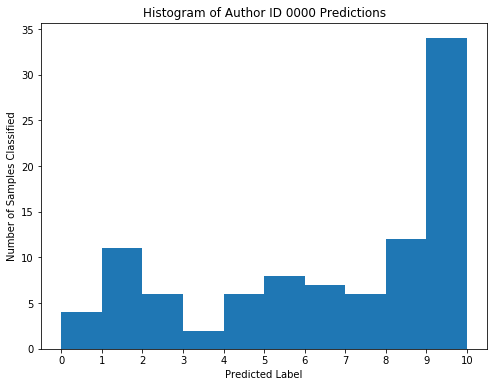

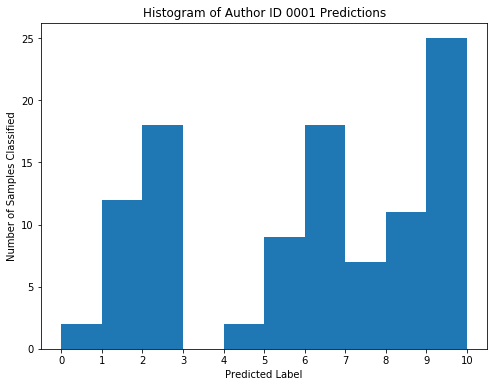

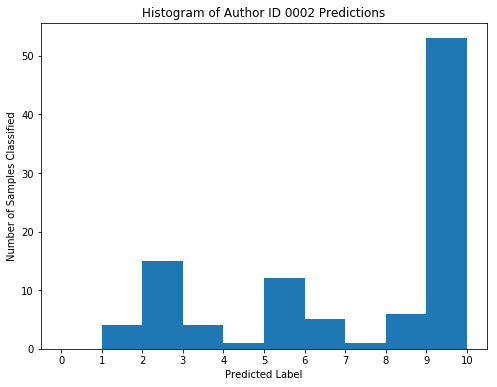

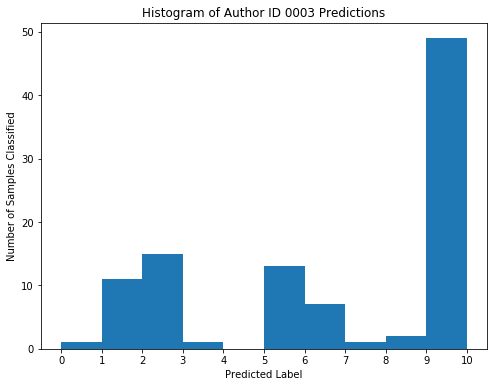

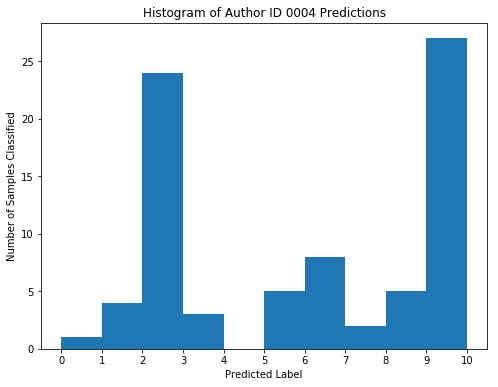

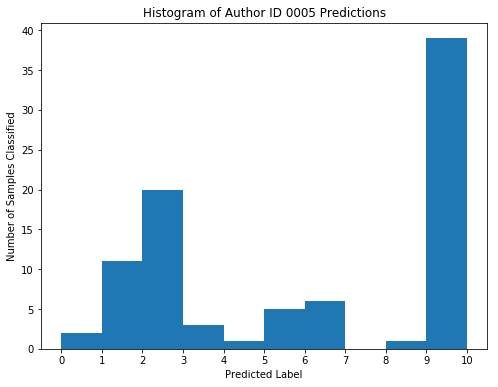

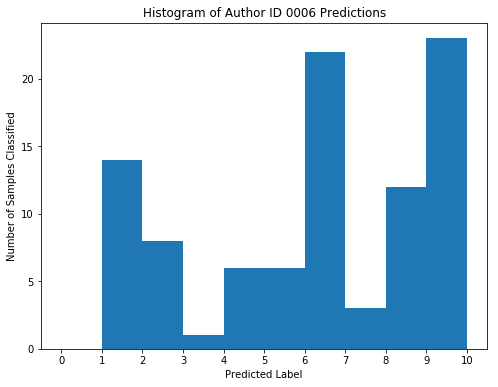

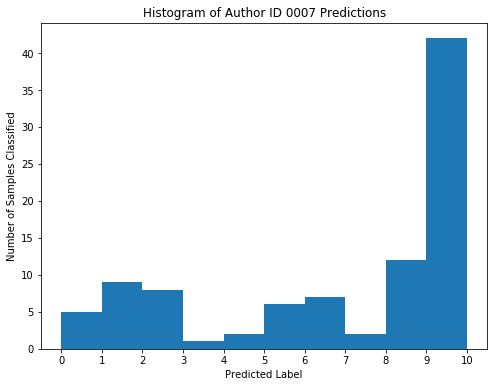

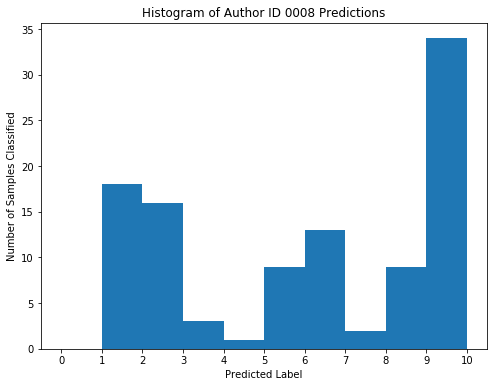

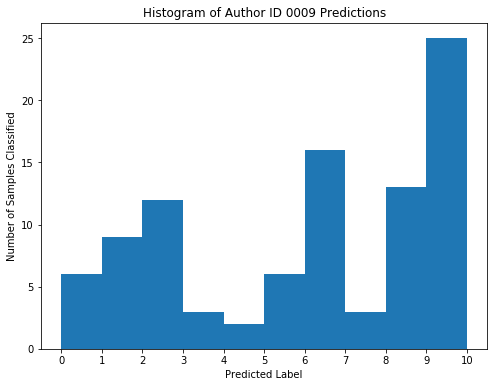

In [19]:
for author_id, data_dict in random_label_per_auth.items():
#.sort_values().unique():
    author_id_df = data_dict["test"]["preds"].astype(np.int8)

    plt.figure(figsize=(8,6))
    plt.hist(author_id_df, bins=bins)
    plt.title("Histogram of Author ID {} Predictions".format(author_id))
    plt.xlabel("Predicted Label")
    plt.ylabel("Number of Samples Classified")
    plt.xticks(ticks=bins, labels=bins)
    plt.show()

## Results

We will use the two-sided Kolmogorov-Smirnov statistic for 2 samples because it can be adapted for discrete distributions, and in this special case, assuming $H_0$ is true, that all writers write the same (a uniform distribution), the derivative of the curve would be 0, meaning that the discrete distribution $\approx$ continuous distribtuion.

In [30]:
from scipy.stats import ttest_rel, ttest_ind, ks_2samp

%store -r preds_by_auth

for author_id, data_dict in random_label_per_auth.items():

    #display(preds_by_auth[author_id].shape, data_dict["test"]["preds"].shape)
    
     tstat, prob = ks_2samp(preds_by_auth[author_id].astype(np.uint8), data_dict["test"]["preds"].astype(np.uint8))
     display(Markdown("Author ID {} : K-S D = {} p-value={}".format(author_id, tstat, prob)))

Author ID 0000 : K-S D = 0.29649914089347074 p-value=0.00029600221897536656

Author ID 0001 : K-S D = 0.39871794871794874 p-value=2.125603393134146e-08

Author ID 0002 : K-S D = 0.4732060834949474 p-value=2.0072078639186591e-10

Author ID 0003 : K-S D = 0.4834408602150537 p-value=1.3565777717688764e-10

Author ID 0004 : K-S D = 0.41043344840813195 p-value=6.223625890586029e-06

Author ID 0005 : K-S D = 0.42121212121212126 p-value=1.4479523882384366e-07

Author ID 0006 : K-S D = 0.32244404113732605 p-value=0.00010774158302194342

Author ID 0007 : K-S D = 0.48035043804755945 p-value=9.68145064064899e-10

Author ID 0008 : K-S D = 0.28179271708683473 p-value=0.00020588241843005027

Author ID 0009 : K-S D = 0.19138755980861244 p-value=0.04987295474230525

For all of the writers, it appears the p-value means it is very improbable that these two sample distributions are drawn from the same distribution. It is interesting to note that for writer 0009, we are just under a p-value of 0.05, meaning the distribution of predictions we saw from the MLP is almost within 95% of what would have occured by random uniform chance.